## Esercizio 11.3

Estendo la rete neurale creata in precedenza per fittare una funzione in due variabili:

$$
f(x,y) = \sin(x^2+y^2)
$$


con $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Per prima cosa genero i punti di traning e di validazione per la rete, utilizzando $N_{trains}=5000$ e $N_{valid}=500$. Plotto di seguito i punti di validazione distribuiti in modo gaussiano con valore medio $\mu$ pari al valore esatto della funzione e per deviazione standard $\sigma$=0.2.

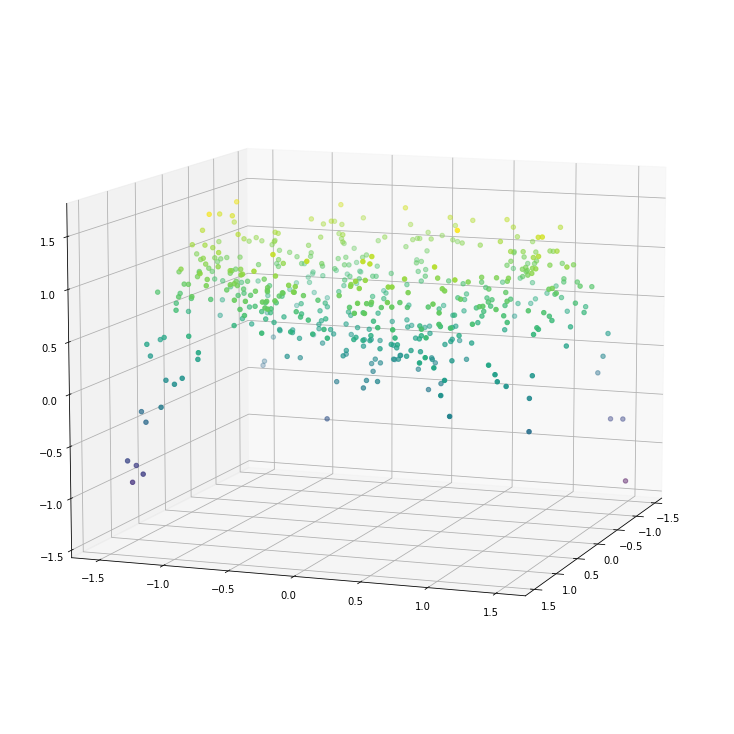

In [28]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] ='True'


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f(x,y):
    return np.sin(x**2+y**2)

N_train=5000
N_valid=500

#genero i punti in input
np.random.seed(0)

xy_train=np.zeros([N_train,2])
xy_valid=np.zeros([N_valid,2])

for i in range(0,N_train):
    xy_train[i] = np.random.uniform(-3/2,3/2,2)

for i in range(0,N_valid):
    xy_valid[i] = np.random.uniform(-3/2,3/2,2)



#ind= xy_valid[:,0].argsort()
#xy_valid = xy_valid[ind]


z_target = np.sin(xy_valid[:,0]**2 + xy_valid[:,1]**2)


sigma=0.2
z_train = np.random.normal(np.sin(xy_train[:,0]**2 + xy_train[:,1]**2), sigma)
z_valid = np.random.normal(np.sin(xy_valid[:,0]**2 + xy_valid[:,1]**2), sigma)


fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)
ax.scatter(xy_valid[:,0], xy_valid[:,1], z_valid, c=z_valid, label="valid")
#ax.set_zlabel('$f(x,y)$')
#ax.legend()
ax.view_init(10, 20)
plt.show()



Costruisco ora la rete che ha come input un vettore bidimensionale e come output un numero. Il numero di hidden layer l'ho scelto a tentativi così come il numero di neuroni. 

Come funzione di attivazione utilizzo come in precedenza selu.

Compilo il modulo con l' ottimizzatore adadelta e come perdita e medrica ho scelto mean-square-error.

In [29]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model=tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,), activation="selu"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, input_shape=(2,), activation="selu"))

model.add(Dense(1, activation='selu'))

model.compile(optimizer='adadelta', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=xy_train, y=z_train, batch_size=32,
          epochs=30, shuffle=True, validation_data=(xy_valid, z_valid))

#model.get_weights()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_38 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_41 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 21        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
___________________________________________________

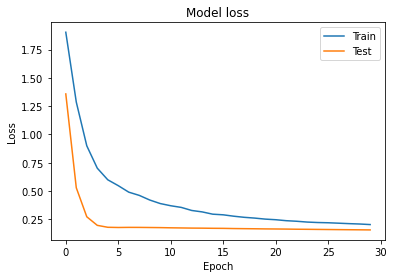

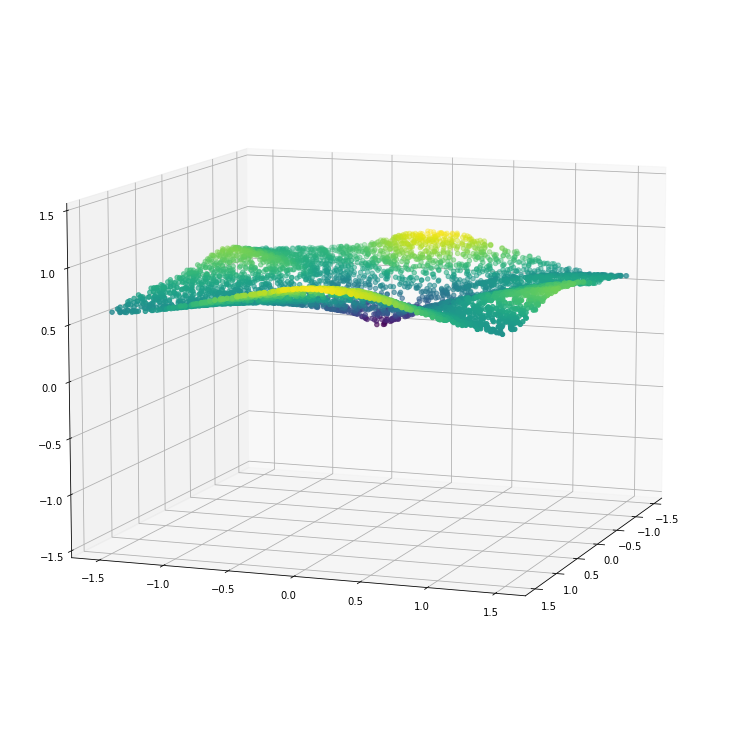

In [26]:
#score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


xy_predicted=np.empty([5000,2])
for i in range(0,5000):
    xy_predicted[i]=np.random.uniform(-3/2,3/2,2)

z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, c=z_predicted, label="valid")
ax.set_zlim(-1.5,1.5)
ax.view_init(10, 20)
plt.show()


Il risultato non è quello atteso, non sono riuscito ad allenare la rete neurale. Ho provato ad aumentare il numero di dati di traini,g, di hidden layer e di epoche, ma la rete non riesce a predirre in modo soddisfacente la funzione. Ho provato anche ad utilizzare diverse funzioni di attivazione Relu, Sigmoid ma le cose sono peggiorate così come utilizzando l' ottimizzare Adadelta.